# 收集数据

In [350]:
import json
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt

In [351]:
#下载image数据并读取为dataframe格式
page =  requests.get('https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv')
with open ('image_predictions.tsv', 'w') as f:
    f.write(page.text)
    f.close()
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [352]:
#读取tweet_json文件数据，并存为dataframe格式
list_tweet = []
with open('tweet_json.txt', 'r') as f:
    tweet_f = f.readlines()
    for line in tweet_f:
        list_tweet.append(json.loads(line))     
    f.close()
df_tweet = pd.DataFrame(list_tweet)
df_tweet

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20548,False,Here we have a majestic great white breaching ...,None,...,False,NaN,NaN,NaN,3240,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12053,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,False,NaN,NaN,NaN,2142,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",66596,False,When you watch your owner call another dog a g...,None,...,False,NaN,NaN,NaN,19548,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28187,False,This is Zoey. She doesn't want to be one of th...,None,...,False,NaN,NaN,NaN,4403,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,None,...,False,NaN,NaN,NaN,7684,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835'

In [353]:
#读取twitter-archive-enhanced.csv文件，并存为dataframe格式
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


# 评估数据

In [354]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [355]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [356]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [357]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [358]:
df_tweet.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2352.000000,2.352000e+03,7.800000e+01,7.800000e+01,2.900000e+01,2352.000000
mean,8109.198980,7.425913e+17,7.455079e+17,2.014171e+16,8.162686e+17,3134.932398
std,11980.795669,6.846210e+16,7.582492e+16,1.252797e+17,6.164161e+16,5237.846296
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1417.000000,6.783949e+17,6.757419e+17,3.086374e+08,7.888183e+17,618.000000
50%,3596.500000,7.193536e+17,7.038708e+17,4.196984e+09,8.340867e+17,1456.500000
75%,10118.000000,7.991219e+17,8.257804e+17,4.196984e+09,8.664587e+17,3628.750000
max,132318.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79116.000000


In [359]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [360]:
df_twitter.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
Buddy          7
an             7
Bailey         7
Daisy          7
Bella          6
Jax            6
Stanley        6
Scout          6
Rusty          6
Jack           6
Koda           6
Oscar          6
Milo           6
Dave           6
Leo            6
George         5
            ... 
Tuck           1
Wishes         1
Sprinkles      1
Monster        1
Tanner         1
Mitch          1
Jett           1
Alf            1
Tyrus          1
Ralphy         1
Trip           1
Divine         1
Duddles        1
Chubbs         1
Ole            1
Henry          1
Colin          1
Rose           1
Tango          1
Lucia          1
Terrenth       1
Hall           1
Benny          1
Evy            1
Eleanor        1
Tessa          1
Blanket        1
Furzey        

In [361]:
df_twitter.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [362]:
#查看评分分母值的分布
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [363]:
#查看评分分子值的分布
df_twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### 质量问题

####  df_twitter
- tweet_id的数据类型为int64
- timestamp的数据类型为对象
- in_reply_to_status_id的数据类型为浮点型
- in_reply_to_user_id的数据类型为浮点型
- retweeted_status_id，retweeted_status_user_id的数据类型为浮点型
- dog name中有a,the,an,O等错误值
- dog name中有缺失值
- dog name中的缺失值被字符串的None代替
- doggo floofer pupper puppo的数据不完整
- doggo floofer pupper puppo中的缺失值被字符串的None代替
- rating_denominator的值中含有不为10的值
- rating_numerator的值中含有不合逻辑的值

#### df_tweet
- id的数据类型为对象
- created_at的数据类型为对象

#### df_image
- twitter_id的数据类型为int64

### 整洁度问题

- 含有非原创的twitter数据内容（有回复及转发的twitter）
- 含有没有图片的twitter
- df_twitter中含有多个不需要的列
- df_twitter中的doggo	floofer	pupper	puppo实际上属于一个变量，即dog的stage变量，因此该四列可以合并为一列
- df_tweet中仅需要retweet_count和favorite_count属性，且该属性属于twitter数据属性，可以合并到df_twitter中
- df_image中的数据为每条推特中图片的识别信息，属于twitter数据属性，可以合并到df_twitter中

# 数据清理

In [364]:
df_clean_twitter = df_twitter.copy()
df_clean_tweet = df_tweet.copy()
df_clean_image = df_image.copy()

## 整洁度清理

#### 定义

- 清除df_twitter中的非原创内容

#### 代码

In [365]:
df_clean_twitter = df_clean_twitter.drop(df_clean_twitter[df_clean_twitter.in_reply_to_status_id.notnull()].index)
df_clean_twitter = df_clean_twitter.drop(df_clean_twitter[df_clean_twitter.retweeted_status_id.notnull()].index)

#### 测试

In [366]:
df_clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### 定义
- 清除df_twitter中不需要的列数据

#### 代码

In [367]:
df_clean_twitter = df_clean_twitter.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id',
                                          'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis = 1)

#### 测试

In [368]:
df_clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


#### 定义
- 根据twitter_id，将df_tweet中的retweet_count和favorite_count合并到df_twitter中

#### 代码

In [369]:
df_clean_tweet = df_clean_tweet.drop(['contributors', 'coordinates', 'created_at', 'display_text_range', 'entities', 
                     'extended_entities', 'favorited','full_text', 'geo', 'id_str', 'in_reply_to_screen_name', 
                     'in_reply_to_status_id', 'in_reply_to_status_id_str','in_reply_to_user_id', 'in_reply_to_user_id_str', 
                     'is_quote_status', 'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable','quoted_status', 
                     'quoted_status_id', 'quoted_status_id_str','retweeted', 'retweeted_status', 'source', 'truncated','user'], axis = 1)

In [370]:
df_clean_twitter = pd.merge(df_clean_twitter, df_clean_tweet, left_on = 'tweet_id', right_on = 'id', how = 'left').drop('id', axis = 1)

#### 测试

In [371]:
df_clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
favorite_count        2097 non-null int64
retweet_count         2097 non-null int64
dtypes: int64(5), object(7)
memory usage: 213.0+ KB


#### 定义
- 根据tweet_id，将df_image合并到df_twitter中，并清除没有图片的推特数据

#### 代码

In [372]:
df_clean_twitter = pd.merge(df_clean_twitter, df_clean_image, on = 'tweet_id', how = 'left')

In [373]:
df_clean_twitter = df_clean_twitter.drop(df_clean_twitter[df_clean_twitter.p1.isna()].index)

#### 测试

In [374]:
df_clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 23 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null

#### 定义
- 将df_twitter中的doggo floofer pupper puppo合并为一个列，列名称为stage，并从text中重新提取stage的值

#### 代码

In [375]:
df_clean_twitter = df_clean_twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [376]:
#stage函数从text内容中提取狗狗的地位数据，若在一条text内容中存在多个不同的地位数据，则返回‘multiple’
def stage(text):
    if re.search(r'([dD]oggo[a-z]*|[pP]uppo[a-z]*|[pP]upper[a-z]*|[fF]loof[a-z]*)', text):
        status = re.findall(r'([dD]oggo[a-z]*|[pP]uppo[a-z]*|[pP]upper[a-z]*|[fF]loof[a-z]*)', text)
        if len(status) > 1: #判断是否有多个地位数据
            repeat = set()
            for i in status:
                repeat.add(i[:5]) #判断地位数据是否重复  
            if len(repeat) > 1:
                return 'multiple' 
        return status[0]
    return None

In [377]:
#从text中提取stage值
df_clean_twitter['stage'] = df_clean_twitter.text.map(stage)

In [378]:
#统一stage值以及大小写
df_clean_twitter.stage = df_clean_twitter.stage.replace([r'[dD]oggo[a-z]*', r'[pP]uppo[a-z]*', r'[pP]upper[a-z]*', r'[fF]loof[a-z]*'], 
                                                       value = ['doggo', 'puppo', 'pupper', 'floofer'], regex = True)

#### 测试

In [379]:
df_clean_twitter.stage.value_counts()

pupper      221
doggo        67
floofer      34
puppo        27
multiple     14
Name: stage, dtype: int64

## 质量问题清理

#### 定义
- 将各列的数据类型转换成合理的类型

#### 代码

In [380]:
df_clean_twitter['tweet_id'] = df_clean_twitter['tweet_id'].astype(str)
df_clean_twitter['timestamp'] = pd.to_datetime(df_clean_twitter['timestamp'])

In [381]:
df_clean_twitter.stage = df_clean_twitter.stage.astype('category')

#### 测试

In [382]:
df_clean_twitter.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,39492,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,33786,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,25445,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,42863,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,41016,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [383]:
df_clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 20 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
stage                 363 non-null category
dtypes: category(1), dat

#### 定义
- 根据text内容重新提取狗的名字

#### 代码

In [384]:
df_clean_twitter.name = df_clean_twitter.text.str.extract(r'(?:[Tt]his is |[Mm]eet |name is |named |[Ss]ay h[a-z]* to |[Hh]ere we have)([A-Z][a-z]*)', expand = True)

#### 测试

In [385]:
df_clean_twitter.name.value_counts()

Charlie       11
Cooper        10
Lucy          10
Oliver        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           7
Toby           7
Daisy          7
Stanley        6
Koda           6
Bella          6
Bo             6
Jax            6
Milo           5
Zoey           5
Scout          5
Leo            5
Louis          5
Rusty          5
Buddy          5
Bailey         5
Chester        5
Oscar          5
Clarence       4
Bentley        4
Cassie         4
Chip           4
              ..
Joshwa         1
Bradlay        1
Taz            1
Banjo          1
Simba          1
Shadoe         1
Scruffers      1
Danny          1
Birf           1
Bauer          1
G              1
Dwight         1
Orion          1
Chuk           1
Jamesy         1
Covach         1
Daniel         1
Livvie         1
Creg           1
Philbert       1
Brandonald     1
Tuco           1
Autumn         1
Petrick        1
Laika          1
Dante          1
Marvin         1
Strider       

In [386]:
sum(df_clean_twitter.name.notnull())

1377

#### 定义
- 根据text内容，重新提取rating_numerator和rating_denominator

#### 代码

In [387]:
#利用正则表达式匹配text中的内容，并提取rating_numerator值
def rate(text):
    if re.search(r'(\d{1,3}|\d{1,3}\.\d{1,2})/([1-9]0|\d{2}0)', text):
        rating = re.findall(r'(\d{1,3}|\d{1,3}\.\d{1,2})/([1-9]0|\d{2}0)', text)
        if len(rating) == 1:
            if rating[0][1] == 10:
                return rating[0][0]
            else:
                return float(rating[0][0]) / (float(rating[0][1]) / 10)
        else:
            return 'ToBeSure'
    return None        

In [388]:
df_clean_twitter.rating_numerator = df_clean_twitter.text.map(rate)

In [389]:
df_clean_twitter.rating_denominator = 10

#### 测试

In [390]:
df_clean_twitter.rating_numerator.value_counts()

12.0        449
10.0        408
11.0        394
13.0        253
9.0         150
8.0          93
7.0          50
14.0         34
6.0          32
5.0          30
ToBeSure     24
3.0          19
4.0          14
2.0           9
1.0           4
11.26         1
9.75          1
776.0         1
11.27         1
13.5          1
420.0         1
0.0           1
Name: rating_numerator, dtype: int64

In [391]:
df_clean_twitter.rating_denominator.value_counts()

10    1971
Name: rating_denominator, dtype: int64

In [392]:
df_clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 20 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
text                  1971 non-null object
rating_numerator      1970 non-null object
rating_denominator    1971 non-null int64
name                  1377 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
stage                 363 non-null category
dtypes: category(1), da

#### 定义
- 分子值中的ToBeSure是指该条推特text中含有不止一个评分，需要进一步查看text内容，人工判断评分分值
- 分子中含有一些异常值，如420,1776，0，1，2以及缺失值等，产生异常值的原因通常为twitter图片内容不是狗，因此推主在打分时给了异常值，将异常值删除，并将rating_numerator的数据类型转换为浮点型

#### 代码

In [393]:
for i in df_clean_twitter[df_clean_twitter.rating_numerator == 'ToBeSure'].text:
    print (i)

"Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10
get it together Flurp https://t.co/Akzl5ynMmE
This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf
This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P
Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ
When b

In [394]:
df_clean_twitter[df_clean_twitter.rating_numerator == 'ToBeSure'].index

Int64Index([ 588,  797,  948,  985, 1005, 1136, 1234, 1239, 1278, 1294, 1307,
            1556, 1592, 1649, 1653, 1719, 1759, 1811, 1860, 1922, 1960, 2005,
            2014, 2047],
           dtype='int64')

- 根据text的内容重新对ToBeSure的分子值进行赋值，其中，部分多个评分是因为对多条狗分别打分，该类情况取均值作为分子值，部分多个评分是因为除狗外，还对别的东西进行了打分，该类情况取狗的评分作为分子值

In [395]:
df_clean_twitter.loc[588, 'rating_numerator'] = 11.5
df_clean_twitter.loc[797, 'rating_numerator'] = 8.5
df_clean_twitter.loc[948, 'rating_numerator'] = 13
df_clean_twitter.loc[985, 'rating_numerator'] = 11
df_clean_twitter.loc[1005, 'rating_numerator'] = 9
df_clean_twitter.loc[1136, 'rating_numerator'] = 9
df_clean_twitter.loc[1234, 'rating_numerator'] = 13
df_clean_twitter.loc[1239, 'rating_numerator'] = 10
df_clean_twitter.loc[1278, 'rating_numerator'] = 13
df_clean_twitter.loc[1294, 'rating_numerator'] = 10
df_clean_twitter.loc[1307, 'rating_numerator'] = 10
df_clean_twitter.loc[1556, 'rating_numerator'] = 10.5
df_clean_twitter.loc[1592, 'rating_numerator'] = 10.5
df_clean_twitter.loc[1649, 'rating_numerator'] = 8.5
df_clean_twitter.loc[1653, 'rating_numerator'] = 10
df_clean_twitter.loc[1719, 'rating_numerator'] = 6.5
df_clean_twitter.loc[1759, 'rating_numerator'] = 8
df_clean_twitter.loc[1811, 'rating_numerator'] = 10
df_clean_twitter.loc[1860, 'rating_numerator'] = 11
df_clean_twitter.loc[1922, 'rating_numerator'] = 9.5
df_clean_twitter.loc[1960, 'rating_numerator'] = 8
df_clean_twitter.loc[2005, 'rating_numerator'] = 10
df_clean_twitter.loc[2014, 'rating_numerator'] = 7.5
df_clean_twitter.loc[2047, 'rating_numerator'] = 10

In [396]:
#删除异常值，并进行数据类型转换
df_clean_twitter.rating_numerator = df_clean_twitter.rating_numerator.astype(float)
df_clean_twitter = df_clean_twitter.drop(df_clean_twitter[df_clean_twitter.rating_numerator > 14].index)
df_clean_twitter = df_clean_twitter.drop(df_clean_twitter[df_clean_twitter.rating_numerator < 5].index)
df_clean_twitter = df_clean_twitter.drop(df_clean_twitter[df_clean_twitter.rating_numerator.isnull()].index)

In [397]:
df_clean_twitter.rating_numerator.value_counts()

12.00    449
10.00    415
11.00    396
13.00    256
9.00     152
8.00      95
7.00      50
14.00     34
6.00      32
5.00      30
10.50      2
8.50       2
13.50      1
11.27      1
9.75       1
11.26      1
6.50       1
9.50       1
7.50       1
11.50      1
Name: rating_numerator, dtype: int64

In [398]:
df_clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 0 to 2096
Data columns (total 20 columns):
tweet_id              1921 non-null object
timestamp             1921 non-null datetime64[ns]
text                  1921 non-null object
rating_numerator      1921 non-null float64
rating_denominator    1921 non-null int64
name                  1357 non-null object
favorite_count        1921 non-null int64
retweet_count         1921 non-null int64
jpg_url               1921 non-null object
img_num               1921 non-null float64
p1                    1921 non-null object
p1_conf               1921 non-null float64
p1_dog                1921 non-null object
p2                    1921 non-null object
p2_conf               1921 non-null float64
p2_dog                1921 non-null object
p3                    1921 non-null object
p3_conf               1921 non-null float64
p3_dog                1921 non-null object
stage                 361 non-null category
dtypes: category(1), d

- 将清理完成后的数据保存为新的CSV文件

In [399]:
df_clean_twitter.to_csv('twitter_archive_master.csv', index = False)

# 分析及可视化

In [400]:
#查看评分分子的分布
df_clean_twitter.rating_numerator.describe()

count    1921.000000
mean       10.742728
std         1.806499
min         5.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

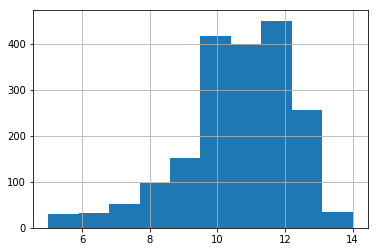

In [401]:
%matplotlib inline
df_clean_twitter.rating_numerator.hist()

**结论：**通过df_clean_twitter.rating_numerator.describe()查看得分分子的信息，在有效的1920个评分中，最低分为5，最高分为14，平均分10.74，标准差为1.8；通过df_clean_twitter.rating_numerator.hist()，对评分的分布进行可视化，可以发现，评分的分布情况近似于正态分布，其中10-12之间的分布较多

In [402]:
#查看stage的分布
df_clean_twitter.stage.value_counts()

pupper      219
doggo        67
floofer      34
puppo        27
multiple     14
Name: stage, dtype: int64

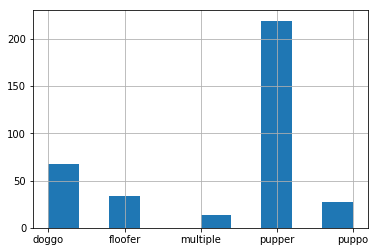

In [403]:
%matplotlib inline
df_clean_twitter.stage.hist()

**结论：**通过df_clean_twitter.stage.value_counts()查看stage的各类值的数量，同时通过df_clean_twitter.stage.hist()对stage进行可视化，可以发现在stage中pupper的数量最多，远超其余三类，之后是doggo的数量，约为floofer数量的两倍，puppo的数量跟floofer的数量较为接近，具有多个stage值的multiple的数量最少。

In [404]:
#查看三个图片预测算法的可信度分布
df_clean_twitter.p1_conf.describe()

count    1921.000000
mean        0.596167
std         0.271463
min         0.044333
25%         0.366875
50%         0.594333
75%         0.847292
max         1.000000
Name: p1_conf, dtype: float64

In [405]:
df_clean_twitter.p2_conf.describe()

count    1.921000e+03
mean     1.350852e-01
std      1.013846e-01
min      1.011300e-08
25%      5.387110e-02
50%      1.186220e-01
75%      1.964140e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [406]:
df_clean_twitter.p3_conf.describe()

count    1.921000e+03
mean     6.010002e-02
std      5.098610e-02
min      1.740170e-10
25%      1.605220e-02
50%      4.923690e-02
75%      9.157150e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

(array([650., 371., 320., 248., 160.,  97.,  46.,  18.,   6.,   5.]),
 array([1.74017000e-10, 2.73419002e-02, 5.46838001e-02, 8.20257001e-02,
        1.09367600e-01, 1.36709500e-01, 1.64051400e-01, 1.91393300e-01,
        2.18735200e-01, 2.46077100e-01, 2.73419000e-01]),
 <a list of 10 Patch objects>)

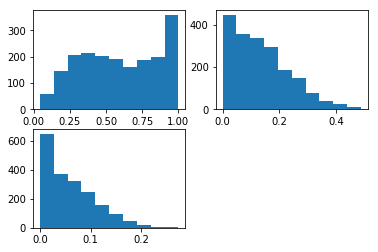

In [407]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax1.hist(df_clean_twitter.p1_conf)
ax2.hist(df_clean_twitter.p2_conf)
ax3.hist(df_clean_twitter.p3_conf)

**结论：**通过describe()分别对图片预测算法的三个预测结果可信度信息进行查看，第一预测结果可信度的均值为59.62%，标准差为27.15%，第二预测结果的可信度均值为13.51%，标准差为10.14%，第三预测结果可信度的均值为6.01%，标准差为5.10%。第一预测结果的可信度均值远远高于第二及第三预测结果；对三个预测结果的可信度进行可视化后可以看出，可能性最大的预测结果的可信度分布近似于负偏斜分布，靠近100%时的可信度数量最多；第二预测结果和第三预测结果的可信度分布近似于正偏斜分布。

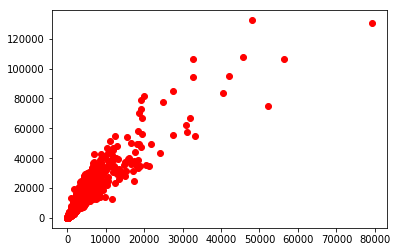

In [408]:
#查看转发数和点赞数的分布相关性
%matplotlib inline
plt.scatter(df_clean_twitter.retweet_count, df_clean_twitter.favorite_count, color = 'r')

**结论：**查看转发数和点赞数的散点分布图，可以看出，随着转发数的增加，点赞数也呈增加趋势，散点图分布轨迹近似于沿一条直线分布，可见，转发数和点赞数呈正相关趋势。